# LightAutoML: ICE and PDP Interpretation Tutorial

Partial dependence plot (PDP) and Individual Conditional Expectation (ICE) are two model-agnostic interpretation methods (see details [here](https://compstat-lmu.github.io/iml_methods_limitations/pdp.html)).

## Download library and make some imports

In [1]:
# !pip install lightautoml

In [2]:
# Standard python libraries
import os
import time
import requests

# Installed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.dataset.roles import DatetimeRole
from lightautoml.tasks import Task

In [3]:
plt.rcParams.update({'font.size': 20})
sns.set(rc={'figure.figsize':(15, 11)})
sns.set(style="whitegrid", font_scale=1.5)

N_THREADS = 8 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 120 # Time in seconds for automl run
TARGET_NAME = 'TARGET' # Target column name

## Prepare data

Load a dataset from the repository if doesn't clone repository by git.

In [4]:
DATASET_DIR = './example_data/test_data_files'
DATASET_NAME = 'sampled_app_train.csv'
DATASET_FULLNAME = os.path.join(DATASET_DIR, DATASET_NAME)
DATASET_URL = 'https://raw.githubusercontent.com/sberbank-ai-lab/LightAutoML/master/example_data/test_data_files/sampled_app_train.csv'

In [5]:
%%time

if not os.path.exists(DATASET_FULLNAME):
    os.makedirs(DATASET_DIR, exist_ok=True)

    dataset = requests.get(DATASET_URL).text
    with open(DATASET_FULLNAME, 'w') as output:
        output.write(dataset)
        
data = pd.read_csv(DATASET_FULLNAME)
data['EMP_DATE'] = (np.datetime64('2018-01-01') + np.clip(data['DAYS_EMPLOYED'], None, 0).astype(np.dtype('timedelta64[D]'))
                    ).astype(str)

CPU times: user 137 ms, sys: 20.4 ms, total: 157 ms
Wall time: 156 ms


In [6]:
train_data, test_data = train_test_split(data, 
                                         test_size=TEST_SIZE, 
                                         stratify=data[TARGET_NAME], 
                                         random_state=RANDOM_STATE)

## Create AutoML from preset

Also works with ``lightautoml.automl.presets.tabular_presets.TabularUtilizedAutoML``.

In [7]:
%%time 

task = Task('binary', )
roles = {'target': TARGET_NAME,}

automl = TabularAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                      )
oof_pred = automl.fit_predict(train_data, roles = roles)

Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


Start automl preset with listed constraints:
- time: 120 seconds
- cpus: 8 cores
- memory: 16 gb

Train data shape: (8000, 123)
Feats was rejected during automatic roles guess: []


Layer 1 ...
Train process start. Time left 115.3800835609436 secs
Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...

===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = 0.6844460124765464
Linear model: C = 5e-05 score = 0.7077847448295033
Linear model: C = 0.0001 score = 0.7193418541623233
Linear model: C = 0.0005 score = 0.7544408272794821
Linear model: C = 0.001 score = 0.7618658156528805
Linear model: C = 0.005 score = 0.76380090981499
Linear model: C = 0.01 score = 0.7615076628659705
Linear model: C = 0.05 score = 0.751848228747374

===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = 0.7093983525815217
Linear model: C = 5e-05 score = 0.7200131623641305
Linear model: C = 0.0001 score = 0.7262705927309783
Lin

Time limit exceeded after calculating fold 3


Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
Optuna may run 1 secs
Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 200 rounds
[100]	valid's auc: 0.762379
[200]	valid's auc: 0.762112
[300]	valid's auc: 0.765982
[400]	valid's auc: 0.762609
Early stopping, best iteration is:
[263]	valid's auc: 0.768574
Lvl_0_Pipe_1_Mod_1_LightGBM fitting and predicting completed
Start fitting Lvl_0_Pipe_1_Mod_1_LightGBM ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 100 rounds
[100]	valid's auc: 0.742344
Early stopping, best iteration is:
[72]	valid's auc: 0.748165

===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_1_LightGBM =====

Training until validation scores don't improve for 100 rounds
[100]	valid's auc: 0.704521
[200]	valid's auc: 0.711919
Early stopping, best iteration is:
[181]	

Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7646562001
bestIteration = 336

Shrink model to first 337 iterations.
Lvl_0_Pipe_1_Mod_3_CatBoost fitting and predicting completed
Start fitting Lvl_0_Pipe_1_Mod_3_CatBoost ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_CatBoost =====

0:	test: 0.5925317	best: 0.5925317 (0)	total: 4.97ms	remaining: 24.8s
100:	test: 0.7122911	best: 0.7185667 (88)	total: 405ms	remaining: 19.6s
200:	test: 0.6888775	best: 0.7210204 (124)	total: 798ms	remaining: 19s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7210203613
bestIteration = 124

Shrink model to first 125 iterations.
Lvl_0_Pipe_1_Mod_3_CatBoost fitting and predicting completed
Start fitting Lvl_0_Pipe_1_Mod_3_CatBoost ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_CatBoost =====

0:	test: 0.5994141	best: 0.5994141 (0)	total: 4.26ms	remaining: 21.3s
100:	test: 0.7269379	best: 0.7294824 (97)	total: 340ms	remaining: 16.5s
200:	test

300:	test: 0.7628066	best: 0.7632877 (274)	total: 941ms	remaining: 14.7s
400:	test: 0.7652228	best: 0.7652228 (400)	total: 1.26s	remaining: 14.4s
500:	test: 0.7689647	best: 0.7690770 (495)	total: 1.57s	remaining: 14.1s
600:	test: 0.7692587	best: 0.7699216 (503)	total: 1.89s	remaining: 13.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7699215806
bestIteration = 503

Shrink model to first 504 iterations.
Lvl_0_Pipe_1_Mod_3_CatBoost fitting and predicting completed
Start fitting Lvl_0_Pipe_1_Mod_3_CatBoost ...

===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_CatBoost =====

0:	test: 0.5712430	best: 0.5712430 (0)	total: 3.88ms	remaining: 19.4s
100:	test: 0.7461017	best: 0.7461017 (100)	total: 319ms	remaining: 15.5s
200:	test: 0.7587440	best: 0.7591663 (196)	total: 636ms	remaining: 15.2s
300:	test: 0.7604653	best: 0.7610693 (272)	total: 951ms	remaining: 14.8s
400:	test: 0.7646509	best: 0.7646615 (366)	total: 1.26s	remaining: 14.5s
500:	test: 0.7682163	best: 0

Time left 31.97278118133545


Time limit exceeded in one of the tasks. AutoML will blend level 1 models.


Blending: Optimization starts with equal weights and score 0.7483238120628555
Blending, iter 0: score = 0.7506060681436807, weights = [0.25012314 0.22841723 0.1982655  0.         0.3231942 ]
Blending, iter 1: score = 0.7506595369284341, weights = [0.28975978 0.20813386 0.19815588 0.         0.30395046]
Blending, iter 2: score = 0.7506595369284341, weights = [0.28975978 0.20813386 0.19815588 0.         0.30395046]
No score update. Terminated

Automl preset training completed in 88.30 seconds.
CPU times: user 11min 59s, sys: 25.4 s, total: 12min 24s
Wall time: 1min 28s


## Calculate interpretation data

ICE shows the functional relationship between the predicted response and the feature separately for each instance. PDP averages the individual lines of an ICE plot.

### Numeric features

For numeric features you can specify ``n_bins`` - number of bins into which the range of feature values is divided.

In [8]:
%%time

grid, ys, counts = automl.get_individual_pdp(test_data, feature_name='DAYS_BIRTH', n_bins=30)

100%|██████████| 30/30 [00:16<00:00,  1.86it/s]


CPU times: user 3min 55s, sys: 20.5 s, total: 4min 16s
Wall time: 16.1 s


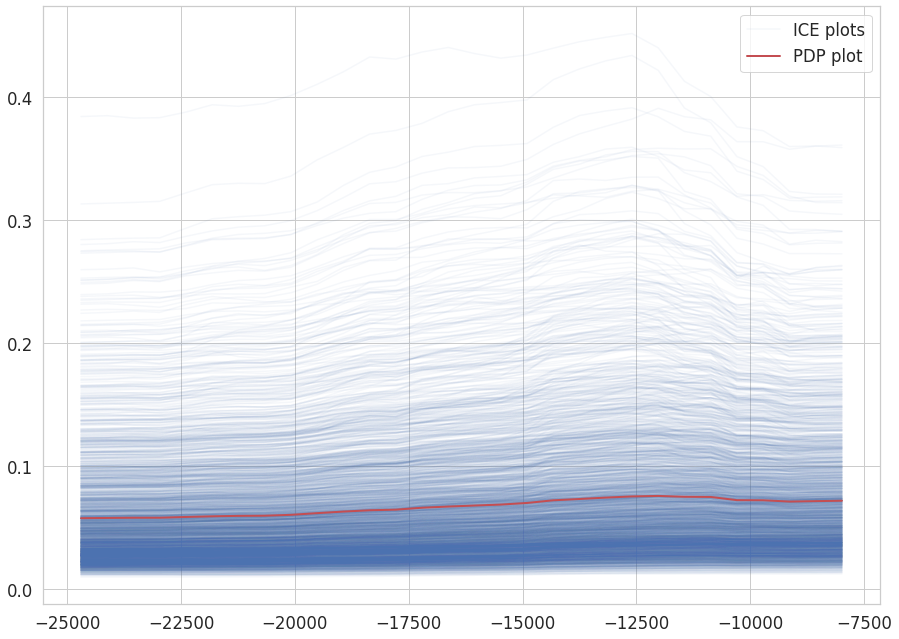

CPU times: user 2.6 s, sys: 36.1 ms, total: 2.64 s
Wall time: 2.63 s


In [9]:
%%time

X = np.array([item.ravel() for item in ys]).T

plt.figure(figsize=(15, 11))
plt.plot(grid, X[0], alpha=0.05, color='b', label='ICE plots')
for i in range(1, X.shape[0]):
    plt.plot(grid, X[i], alpha=0.05, color='b')
plt.plot(grid, X.mean(axis=0), linewidth=2, color='r', label='PDP plot')
plt.legend()
plt.show()

### Categorical features

In [10]:
%%time

grid, ys, counts = automl.get_individual_pdp(test_data, feature_name='NAME_INCOME_TYPE')

100%|██████████| 4/4 [00:02<00:00,  1.96it/s]


CPU times: user 30.8 s, sys: 2.62 s, total: 33.4 s
Wall time: 2.05 s


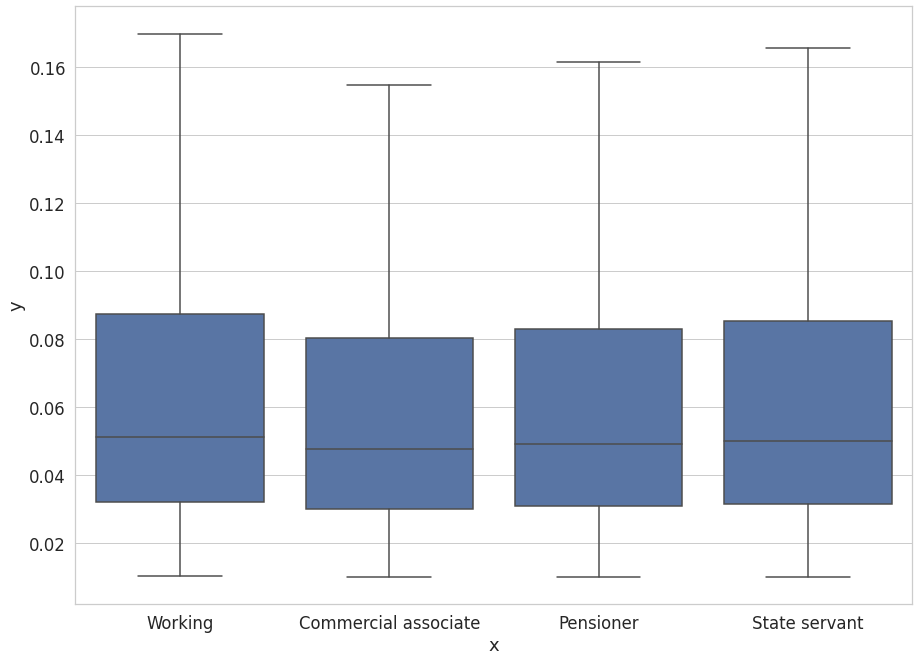

CPU times: user 165 ms, sys: 11.8 ms, total: 177 ms
Wall time: 174 ms


In [11]:
%%time

data = pd.concat([pd.DataFrame({'x': grid[i], 'y': ys[i].ravel()}) for i, _ in enumerate(grid)])

sns.boxplot(data=data, x='x', y='y', showfliers=False, color='b')
plt.show()

### Datetime features

For datetime features you can specify groupby level, allowed values: ``year``, ``month``, ``dayofweek``.

In [12]:
%%time

grid, ys, counts = automl.get_individual_pdp(test_data, feature_name='EMP_DATE', datetime_level='month')

100%|██████████| 12/12 [00:06<00:00,  1.86it/s]


CPU times: user 1min 35s, sys: 6.76 s, total: 1min 42s
Wall time: 6.47 s


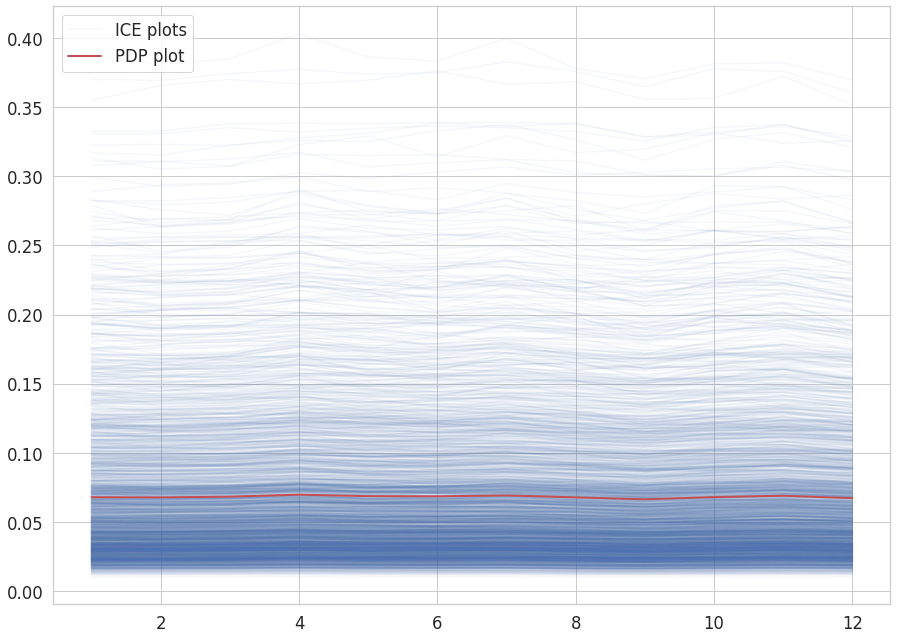

CPU times: user 5.48 s, sys: 60.5 ms, total: 5.54 s
Wall time: 5.53 s


In [13]:
%%time

X = np.array([item.ravel() for item in ys]).T

plt.figure(figsize=(15, 11))
plt.plot(grid, X[0], alpha=0.05, color='b', label='ICE plots')
for i in range(1, X.shape[0]):
    plt.plot(grid, X[i], alpha=0.05, color='b')
plt.plot(grid, X.mean(axis=0), linewidth=2, color='r', label='PDP plot')
plt.legend()
plt.show()